In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_percentage_error
from sklearn.metrics import mean_squared_log_error
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/gdrive')
housing_data =pd.read_csv('gdrive/My Drive/Housing.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [28]:
housing_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


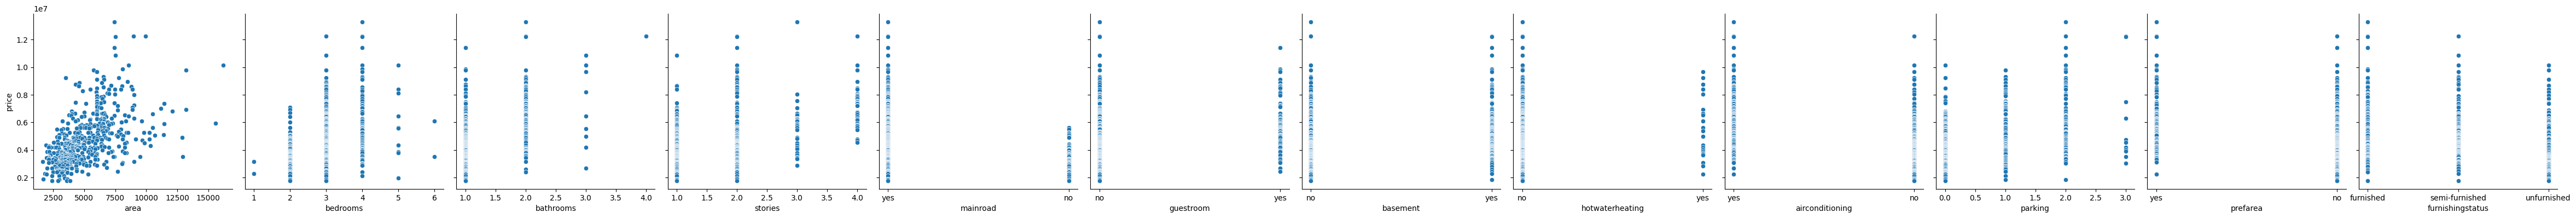

In [29]:
housing_data.head()

sns.pairplot(housing_data, x_vars=[ 'area', 'bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus'], y_vars = 'price', height = 4, kind = 'scatter' )
plt.show()

In [30]:
data = pd.get_dummies(housing_data, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
                                     'prefarea', 'furnishingstatus'], drop_first=True)
X = data.drop('price', axis=1)
y = data['price']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,random_state=100)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [32]:
print("Coefficients:", model.coef_)

Coefficients: [ 1.99644473e+02  8.78888413e+04  9.94938375e+05  5.30295932e+05
  2.87676539e+05  5.37746526e+05  4.19562925e+05  2.27821451e+05
  9.43416562e+05  6.64233004e+05  8.00908947e+05 -1.40167504e+05
 -4.55630618e+05]


In [33]:
y_pred = model.predict(X_test)

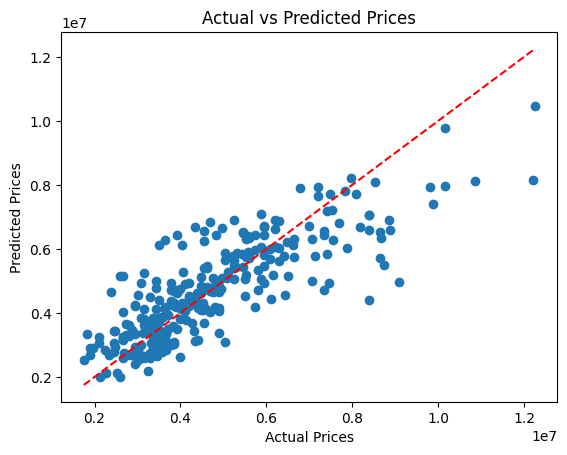

In [34]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

In [35]:
mse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
MAPE = mean_absolute_percentage_error(y_test,y_pred)
MSLE = mean_squared_log_error(y_test,y_pred)
MAE = np.sqrt(mean_squared_error(y_test,y_pred))
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("MAPE:",MAPE)
print("MSLE:",MSLE)
print("MAE:",MAE)

Intercept: 168263.46903593373
Mean Squared Error: 1101651.196003669
R-squared: 0.6749221226830706
MAPE: 0.1816945555702065
MSLE: 0.05076067552695167
MAE: 1101651.196003669
